# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210609_batch_OLSy_48019prodigal.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [109]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (13, 8)

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

## Functions

In [110]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):
    
    def template_checker(HEX):
        submission_df = (HEX["CODIGO MUNICIPIO"].astype("string") + HEX["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        template_df = (template["CODIGO MUNICIPIO"].astype("string") + template["NOMBRE MUNICIPIO"]).sort_values().reset_index(drop=True)
        check_df = pd.DataFrame({"submission_df":submission_df,"template_df":template_df})
        check_df["check"] = check_df.submission_df == check_df.template_df
        if (check_df.check == False).any():
            pd.options.display.max_rows = 112
            return check_df.loc[check_df.check == False,:]
        else:  
            return "All Municipality Names and Codes to be submitted match the Template"
    
    print("Submission form Shape is", HEX.shape)
    print("Number of Municipalities is", HEX["CODIGO MUNICIPIO"].nunique())
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

    assert HEX.shape == (112, 3), "Error: Shape is incorrect."
    assert HEX["CODIGO MUNICIPIO"].nunique() == 112, "Error: Number of unique municipalities is correct."    
    return template_checker(HEX)

## Get the data

In [111]:
QUEEN_train = pd.read_csv('../Feeder_years/WBds03_QUEENtrainYEARS.csv', sep=',')
QUEEN_predict = pd.read_csv('../Feeder_years/WBds03_QUEENpredictYEARS.csv', sep=',')

clustersMario = pd.read_csv("../auxiliary_files/WBds_CLUSTERSnests.csv")

template = pd.read_csv("../../../Input_open_data/ds01_PLANTILLA-RETO-AVISPAS-KOPURU.csv",sep=";", encoding="utf-8")

In [112]:
#QUEEN_predict.isnull().sum()

In [113]:
QUEEN_train.shape

(224, 40)

In [114]:
QUEEN_predict.shape

(112, 40)

## Add in more Clusters (nest amount clusters)

In [115]:
QUEEN_train = pd.merge(QUEEN_train, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])
QUEEN_predict = pd.merge(QUEEN_predict, clustersMario, how = 'left', on = ['municip_code', 'municip_name'])

In [116]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [117]:
QUEEN_train.shape

(224, 41)

In [118]:
QUEEN_predict.shape

(112, 41)

In [119]:
#QUEEN_train.isnull().sum()

In [120]:
#QUEEN_predict.isnull().sum()

In [121]:
QUEEN_predict.Cluster.value_counts()

0.0    66
2.0    41
1.0     4
4.0     1
Name: Cluster, dtype: int64

## Determine feature importance

In [122]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code'])

In [123]:
y = QUEEN_train['NESTS']

In [124]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [125]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: year_offset, Score: -23.56435
Feature: colonies_amount, Score: 9.64922
Feature: food_fruit, Score: 37.08409
Feature: food_apple, Score: -13.93297
Feature: food_txakoli, Score: 16.17032
Feature: food_kiwi, Score: -3.82367
Feature: food_pear, Score: -0.06788
Feature: food_blueberry, Score: 10.16787
Feature: food_raspberry, Score: 3.65855
Feature: weath_days_frost, Score: 4.34280
Feature: weath_humidity, Score: -6.74430
Feature: weath_maxLevel, Score: 17.64225
Feature: weath_midLevel, Score: -28.66336
Feature: weath_minLevel, Score: 21.15902
Feature: weath_days_rain, Score: 8.49121
Feature: weath_days_rain1mm, Score: 15.88702
Feature: weath_accuRainfall, Score: -2.18152
Feature: weath_10minRainfall, Score: 3.00078
Feature: weath_1dayRainfall, Score: 14.39251
Feature: weath_solar, Score: 2.26159
Feature: weath_meanTemp, Score: 9.84983
Feature: weath_maxTemp, Score: 1.52658
Feature: weath_maxMeanTemp, Score: -13.31617
Feature: weath_minTemp, Score: 10.65421
Feature: weath_meanWindM

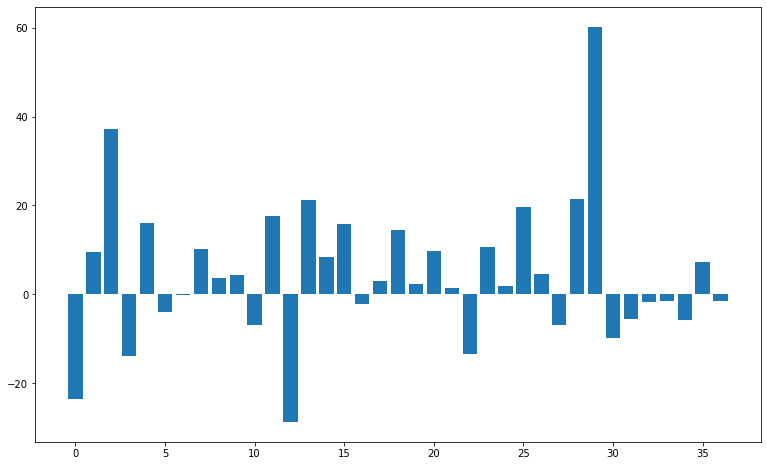

In [126]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [127]:
for i,v in enumerate(importance):
    if abs(v) > 1:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: year_offset, Score: -23.56
Feature: colonies_amount, Score: 9.65
Feature: food_fruit, Score: 37.08
Feature: food_apple, Score: -13.93
Feature: food_txakoli, Score: 16.17
Feature: food_kiwi, Score: -3.82
Feature: food_blueberry, Score: 10.17
Feature: food_raspberry, Score: 3.66
Feature: weath_days_frost, Score: 4.34
Feature: weath_humidity, Score: -6.74
Feature: weath_maxLevel, Score: 17.64
Feature: weath_midLevel, Score: -28.66
Feature: weath_minLevel, Score: 21.16
Feature: weath_days_rain, Score: 8.49
Feature: weath_days_rain1mm, Score: 15.89
Feature: weath_accuRainfall, Score: -2.18
Feature: weath_10minRainfall, Score: 3.00
Feature: weath_1dayRainfall, Score: 14.39
Feature: weath_solar, Score: 2.26
Feature: weath_meanTemp, Score: 9.85
Feature: weath_maxTemp, Score: 1.53
Feature: weath_maxMeanTemp, Score: -13.32
Feature: weath_minTemp, Score: 10.65
Feature: weath_meanWindM, Score: 1.92
Feature: weath_maxWindM, Score: 19.61
Feature: weath_meanDayMaxWind, Score: 4.59
Feature: p

## Train the model

### With the variables suggested by the Feature Importance method

In [128]:
model = ols('NESTS ~ colonies_amount + food_fruit + food_apple + food_txakoli + food_kiwi + food_blueberry + food_raspberry + weath_days_frost + weath_humidity + weath_maxLevel + weath_midLevel + weath_minLevel + weath_days_rain + weath_days_rain1mm + weath_accuRainfall + weath_10minRainfall + weath_1dayRainfall + weath_solar + weath_meanTemp + weath_maxTemp + weath_maxMeanTemp + weath_minTemp + weath_meanWindM + weath_maxWindM + weath_meanDayMaxWind + C(cluster_size) + C(cluster_cosmo) + C(cluster_survive) + C(cluster_food) + C(cluster_weather_wet) + C(cluster_weather_temp) + C(cluster_weather_wind) + C(cluster_weather_level) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     16.51
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.96e-42
Time:                        19:17:23   Log-Likelihood:                -916.50
No. Observations:                 224   AIC:                             1913.
Df Residuals:                     184   BIC:                             2049.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

### Backward elimination

In [129]:
model = ols('NESTS ~ colonies_amount + food_txakoli + food_blueberry + weath_maxLevel + weath_minLevel + weath_days_rain + weath_1dayRainfall + weath_meanWindM + weath_maxWindM + weath_meanDayMaxWind + C(cluster_size) + C(cluster_cosmo) + C(cluster_survive) + C(cluster_food) + C(cluster_weather_level) + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     32.68
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.52e-53
Time:                        19:17:23   Log-Likelihood:                -919.08
No. Observations:                 224   AIC:                             1882.
Df Residuals:                     202   BIC:                             1957.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

## Predict 2020's nests

In [130]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0       21.878685
1       70.634906
2       -3.108096
3       -4.929960
4      102.457050
          ...    
107     26.666485
108     30.820888
109     29.240944
110     20.846360
111      5.248194
Length: 112, dtype: float64

In [131]:
y_2020.sum()

2714.8013990044046

In [132]:
# Take any municipality/month resulting in NESTS < 0 to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       21.878685
1       70.634906
2        0.000000
3        0.000000
4      102.457050
          ...    
107     26.666485
108     30.820888
109     29.240944
110     20.846360
111      5.248194
Length: 112, dtype: float64

In [133]:
y_2020.sum()

2791.31735947052

In [134]:
QUEEN_predict['NESTS'] = y_2020

In [136]:
HEX = QUEEN_predict.loc[:,['municip_code', 'municip_name', 'NESTS']]

## Adjust manually for Bilbao 48020 and generate the output

In [98]:
HEX.loc[HEX.municip_code.isin([48020]), 'NESTS'] = 0

In [137]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
27,48020,Bilbao,0.000000
60,48022,Karrantza Harana/Valle de Carranza,34.665035
62,48051,Lanestosa,20.560003
83,48071,Muskiz,12.021376
99,48088,Ubide,0.000000
102,48074,Urduña/Orduña,34.385037


In [100]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [101]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2791


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [102]:
HEX.to_csv('WaspBusters_20210609_batch-OLSy-48019prodigal.csv', index=False)

## VERSION Manual adjustments

In [103]:
HEX.columns = ['municip_code', 'municip_name', 'NESTS'] # change column names to Spanish (Competition template)

In [104]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051]), 'NESTS'] = [0,0,1,0,1]

In [105]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,1.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,1.0


In [106]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

In [107]:
check_data(HEX)

Submission form Shape is (112, 3)
Number of Municipalities is 112
The Total 2020 Nests' Prediction is 2691


'All Municipality Names and Codes to be submitted match the Template'

### Export dataset for submission

In [108]:
HEX.to_csv('WaspBusters_20210609_batch-OLSy-48019prodigal-manual0s.csv', index=False)